## 导入pytorch

In [5]:
import torch
import torchvision
import torchvision.transforms as transforms

## loading and normalizeing CIFAR10
如果使用`torchvision.datasets`，下载出现问题，在anaconda prompt输入如下命令
```
pip install ipywidgets
jupyter nbextension enable --py widgetsnbextension
```

In [6]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [7]:
torch.utils.data.DataLoader(0)

dataset of train and test

In [8]:
trainset = torchvision.datasets.CIFAR10(root=r'H:\deepLearning\dataset\cifar10', train=True,
                                       download=True, transform=transform)

Using downloaded and verified file: H:\deepLearning\dataset\cifar10\cifar-10-python.tar.gz
Extracting H:\deepLearning\dataset\cifar10\cifar-10-python.tar.gz to H:\deepLearning\dataset\cifar10


In [11]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: H:\deepLearning\dataset\cifar10
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [9]:
testset = torchvision.datasets.CIFAR10(root=r'H:\deepLearning\dataset\cifar10', train=False,
                                       download=True, transform=transform)

Files already downloaded and verified


In [10]:
testset

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: H:\deepLearning\dataset\cifar10
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

dataloader of train and test

In [12]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=0)
testloader  = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True, num_workers=0)

In [13]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

## show images

In [14]:
import matplotlib.pyplot as plt
import numpy as np


In [15]:
def imshow(img):
    img = img/2 + 0.5
    print(type(img))
    npimg = img.numpy()
    npimg = np.transpose(npimg, (1,2,0))
    plt.imshow(npimg)
    plt.show()

In [16]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

<class 'torch.Tensor'>


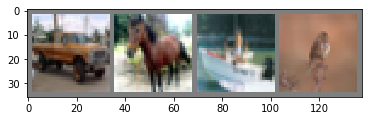

truck horse  ship  bird


In [17]:
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## define a convolutional neural network

In [76]:
import torch.nn as nn
import torch.nn.functional as F


In [114]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool  = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [115]:
net = Net()

## define a loss function and optimizer

In [116]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


## Train the network

In [117]:
import time

In [118]:
trainloader1 = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True, num_workers=0)
testloader1  = torch.utils.data.DataLoader(testset, batch_size=16, shuffle=True, num_workers=0)

In [119]:
t_begin = time.time()
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader1, 0):
        inputs, labels = data
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        #
        running_loss += loss.item()
        if i%2000 == 1999:
            print('[%d, %5d loss:%.3f]' % (epoch+1, i+1, running_loss/2000))
            running_loss = 0.0
print('Finished Training')
print(f'Spend: {time.time()-t_begin}s')

[1,  2000 loss:2.252]
[2,  2000 loss:1.682]
Finished Training
Spend: 46.8405876159668s


In [37]:
PATH = r'H:\deepLearning\dataset\cifar10\cifar_net.pth'
torch.save(net.state_dict(), PATH)

## test the network on test data

<class 'torch.Tensor'>


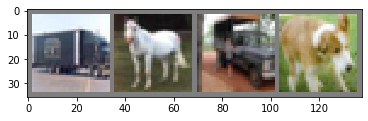

GroundTruth:  truck horse truck   dog


In [41]:
dataiter = iter(testloader)
images, labels = dataiter.next()
#
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [69]:
net = Net()
net.load_state_dict(torch.load(PATH))
outputs = net(images)

In [43]:
_, predicted = torch.max(outputs,1)
print('Predicted: ', ' '.join('%5s'%classes[predicted[j]] for j in range(4)))

Predicted:  truck horse horse   dog


Let us look at how the network performs on the whole dataset.

In [44]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted==labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


Hmmm, what are the classes that performed well, and the classes that did not perform well

In [60]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        #c = (predicted == labels).squeeze()
        c = (predicted == labels)
        #print(f'predicted: {predicted}')  # predicted: tensor([7, 5, 3, 7])
        #print(f'labels: {labels}')        # labels: tensor([7, 5, 5, 7])
        #print(f'c: {c}')                  # c: tensor([ True,  True, False,  True])
        for i in range(4):
            label = labels[i]
            # bool型与number进行计算时，True当做1， False当做0; 即：1+True=2, 1+False=1
            class_correct[label] += c[i].item()
            class_total[label] += 1
        #print(class_correct)

In [61]:
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 61 %
Accuracy of   car : 44 %
Accuracy of  bird : 35 %
Accuracy of   cat : 30 %
Accuracy of  deer : 63 %
Accuracy of   dog : 48 %
Accuracy of  frog : 68 %
Accuracy of horse : 72 %
Accuracy of  ship : 53 %
Accuracy of truck : 71 %


## train on CPU


In [153]:
trainloader2 = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True, num_workers=0)
testloader2  = torch.utils.data.DataLoader(testset, batch_size=16, shuffle=True, num_workers=0)

In [154]:
device = torch.device("cpu")
device

device(type='cpu')

In [155]:
net = Net().to(device)
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [156]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [157]:
t_begin = time.time()
for epoch in range(1):
    running_loss = 0.0
    for i, data in enumerate(trainloader2, 0):
        #inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        #
        running_loss += loss.item()
        if i%2000 == 1999:
            print('[%d, %5d loss:%.3f]' % (epoch+1, i+1, running_loss/2000))
            running_loss = 0.0
print('Finished Training')
print(f'Spend: {time.time()-t_begin}')

[1,  2000 loss:1.065]
Finished Training
Spend: 21.82202982902527


##  train on GPU
在GPU上训练时，有如下几点需要注意：
- batch_size最好大一些，GPU强在并行运算，如果batch_size太小，反而不如CPU快
- 任务管理器显示的GPU占用率有点迟钝，实时性可能会太差

In [158]:
from torch.autograd import Variable

In [163]:
trainloader2 = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=0)
testloader2  = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=True, num_workers=0)

In [164]:
net = Net().cuda()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [168]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss().cuda()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [169]:
t_begin = time.time()
for epoch in range(1):
    running_loss = 0.0
    for i, data in enumerate(trainloader2, 0):
        #inputs, labels = data
        inputs, labels = data[0].cuda(), data[1].cuda()
        inuts = Variable(inputs)
        labels = Variable(labels)
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        #
        running_loss += loss.item()
        if i%2000 == 1999:
            print('[%d, %5d loss:%.3f]' % (epoch+1, i+1, running_loss/2000))
            running_loss = 0.0
print('Finished Training')
print(f'Spend: {time.time()-t_begin}')

Finished Training
Spend: 8.583918571472168
